<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#§2.-2変量の場合の主成分の導出-(-1-)" data-toc-modified-id="§2.-2変量の場合の主成分の導出-(-1-)-1">§2. 2変量の場合の主成分の導出 ( 1 )</a></span><ul class="toc-item"><li><span><a href="#固有分解" data-toc-modified-id="固有分解-1.1">固有分解</a></span></li><li><span><a href="#ex.1" data-toc-modified-id="ex.1-1.2">ex.1</a></span></li><li><span><a href="#寄与率" data-toc-modified-id="寄与率-1.3">寄与率</a></span></li></ul></li><li><span><a href="#§3.-2変量の場合の主成分の導出-(-2-)" data-toc-modified-id="§3.-2変量の場合の主成分の導出-(-2-)-2">§3. 2変量の場合の主成分の導出 ( 2 )</a></span></li><li><span><a href="#§4.-変量の標準化" data-toc-modified-id="§4.-変量の標準化-3">§4. 変量の標準化</a></span></li><li><span><a href="#§5.-p変量の場合の主成分の導出-(-1-)" data-toc-modified-id="§5.-p変量の場合の主成分の導出-(-1-)-4">§5. p変量の場合の主成分の導出 ( 1 )</a></span></li><li><span><a href="#§9.-具体的な適用例" data-toc-modified-id="§9.-具体的な適用例-5">§9. 具体的な適用例</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "IPAexGothic"

# §2. 2変量の場合の主成分の導出 ( 1 )

（統計的根拠はないが）指標の一つとしてよく使用されるのが主成分である。
多次元のデータ（$x_1, x_2, ...,x_n$）を代表する変量を探したい、というのがモチベーションであり、その変量を各変量の線形結合で定義する。
まず2変量の場合の主成分の導出について議論する。
合成変量は

$$
z = a_1x_1 + a_2x_2
$$

と定義する。個々に$x_i$を使用するのではなく、$z$ を使用することができれば次元圧縮が可能となり、トレーニングがうまくいく可能性がある。
そのため主成分分析は前処理で使用される。

データを「代表する」、ということは $z$ で特徴をよく捉えている、ということである。
ここで主成分分析の考え方では、分散が最大となる $z$ を定義できれば、データを捉えることができている、と考える。

$$
V(z) = a_{1}^2 s_{11} + 2a_1a_2 s_{12} + a_2^2s_{22}
$$

いま $z=a_1x_1 + a_2x_2$ であり

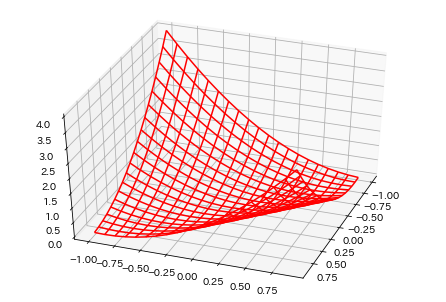

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

a1 = np.arange(-1, 1, 0.1)
a2 = np.arange(-1, 1, 0.1)
a11, a22 = np.meshgrid(a1, a2)
z = a11**2 + 2 * a11 * a22 + a22**2

fig = plt.figure()
ax1 = Axes3D(fig)
 
ax1.plot_wireframe(a11, a22, z, color="red")
#ax1.scatter3D(X, Y, Z)
ax1.set_label("a1")
ax1.set_label("a2")
ax1.view_init(40, 20)
    
plt.show()

## 固有分解

２変数のデータから共分散行列を作成し、`numpy.linalg`のメソッドを用いて固有分解（固有値分解）する。

そもそも固有値とは

$$
Ax = \lambda x
$$

の係数 $\lambda$ のことである。固有値は一つだけとは限らず複数個存在し、それに対応するベクトル$x$（固有ベクトル）も複数存在する。そこで、固有値を対角成分に並べた行列と、固有ベクトルを横に並べた行列を用意すると、それら複数の解は一行で表すことができる。例えば$3\times3$行列の場合

$$        
\Lambda = 
\left[\begin{array}{ccc}
    \lambda_1 & 0             & 0  \\
     0            & \lambda_2 & 0  \\
     0            & 0             & \lambda_3
\end{array}\right]
$$

$$
X =
\left( \vec{x}~~\vec{y}~~\vec{z} \right)
=
\left[\begin{array}{ccc}
    x_{1} & y_{1} & z_{1}  \\
    x_{2} & y_{2} & z_{2}  \\
    x_{3} & y_{3} & z_{3}  \\
\end{array}\right]
$$

を用意すると

$$
AX = X\Lambda 
$$

で全ての固有値と固有ベクトルを含んだ関係式を記述することができる（$\Lambda$を掛ける方向が少し直感と反しているので注意）。このときに、両辺右から$X^{-1}$を掛けることで行列式$A$について方程式を書き直すことができ：

$$
A = X\Lambda X^{-1}
$$

行列 $A$ を分解できていると捉えることができる。
このように、固有値と固有ベクトルで表された関係式に分解することを固有分解と呼ぶ。

## ex.1

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "x1" : [29, 71, 74, 52, 77, 60, 81, 61, 70, 53, 69, 87, 83, 76, 87, 77, 38, 67, 83, 47, 70, 81, 51 ],
    "x2" : [33, 68, 91, 56, 92, 85, 91, 84, 75, 70, 64, 89, 75, 61, 82, 80, 43, 73, 77, 61, 62, 51, 16 ],
    "x3" : [55, 72, 79, 58, 96, 66, 73, 72, 81, 73, 96, 90, 96, 67, 78, 78, 45, 78, 80, 56, 88, 63, 36 ],
    "x4" : [79, 64, 76, 60, 88, 66, 63, 78, 67, 51, 57, 85, 81, 57, 82, 70, 12, 67, 67, 21, 51, 66, 48],
    "x5" : [84, 97, 100, 85, 98, 88, 95, 92, 96, 92, 97, 100, 98, 86, 97, 94, 96, 95, 100, 95, 96, 92, 84],
}
)
df

,x1,x2,x3,x4,x5
0,29,33,55,79,84
1,71,68,72,64,97
2,74,91,79,76,100
3,52,56,58,60,85
4,77,92,96,88,98
5,60,85,66,66,88
6,81,91,73,63,95
7,61,84,72,78,92
8,70,75,81,67,96
9,53,70,73,51,92


In [4]:
np.round(df[["x3", "x5"]].cov() * (len(df)-1)/len(df), 2)

,x3,x5
x3,239.24,53.02
x5,53.02,24.95


In [5]:
mat = np.array(df[["x3", "x5"]])
cov_mat = np.cov(mat.T, bias=True)

固有値分解は`numpy`の`linalg.eig`を用いることで簡単に行うことができる。留意点としては、固有値ベクトルではなく、ベクトルを行列としてまとめたものが返ってくるので、要素にアクセスする時に添え字の範囲を間違えてはいけない。

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("固有値： \n", eigen_vals)
print("固有ベクトル : \n", eigen_vecs)

固有値： 
 [251.64232311  12.55427424]
固有ベクトル : 
 [[ 0.97372618 -0.22772204]
 [ 0.22772204  0.97372618]]


In [7]:
a_1st_1 = eigen_vecs.T[0][0]
a_1st_2 = eigen_vecs.T[0][1]
a_2nd_1 = eigen_vecs.T[1][0]
a_2nd_2 = eigen_vecs.T[1][1]

eigen_vecs.T[0]

array([0.97372618, 0.22772204])

求めた固有値から理解のために視覚化を行う。

$$
z = a_1 x_1 + a_2 x_2 = \mathrm{cos}\theta_1x_1 + \mathrm{sin}\theta_1 x_2
$$

という関係性を思い出すと、新しい座標軸$z$は $\mathrm{tan}\theta_1$だけ、$(x_1,x_2)$座標から回転を受けた軸として記述することができる。さらに見やすくするために、原点を$(0,0)$ではなく、$(\bar{x_1}, \bar{x_2})$に移動させている。

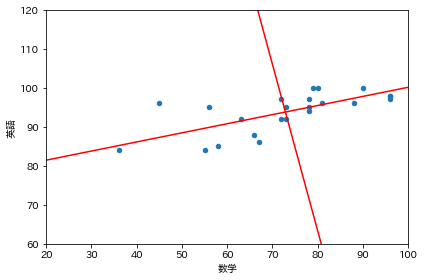

In [8]:
fig, axes = plt.subplots()

df[["x3", "x5"]].plot("x3", "x5", kind="scatter", ax=axes)

x = np.linspace(0,100,10)
axes.plot(x, a_1st_2/a_1st_1 * (x -df["x3"].mean()) + df["x5"].mean(), color="red")
axes.plot(x, a_2nd_2/a_2nd_1 * (x -df["x3"].mean()) + df["x5"].mean(), color="red")

axes.set_xlim(20,100)
axes.set_ylim(60,120)

axes.set_xlabel("数学")
axes.set_ylabel("英語")

plt.tight_layout()

In [9]:
df["z1"] = df["x3"] * a_1st_1 + df["x5"] * a_1st_2
df["z2"] = df["x3"] * a_2nd_1 + df["x5"] * a_2nd_2

## 寄与率
元の変数（ここでは$x3$と$x5$）の分散の総和に対して、$z1$と$z2$の分散の比を取ったものを寄与率と呼ぶ。元々の分散を、新しく定義した主成分がどれくらい説明しているかの指標となる。

ここでは第一主成分が元の変数のばらつきをほとんど説明することができていると理解することができる。

In [10]:
print(round(df["z1"].var()/(df["x3"].var() + df["x5"].var()), 4))
print(round(df["z2"].var()/(df["x3"].var() + df["x5"].var()), 4))

0.9525
0.0475


# §3. 2変量の場合の主成分の導出 ( 2 )

相関係数は

$$
r_{xy} = \frac{ \frac{1}{n} \sum (x_i-\bar{x})(y_i - \bar{y})}{\frac{1}{n}(x_i-\bar{x})^2\frac{1}{n}(x_i-\bar{x})^2} = \frac{s_{xy}}{s_{xx}s_{yy}}
$$

２変量の共分散を、それぞれの分散で割ったものとして定義される。2変数に相関があれば$r_{xy}$は1に近づくため、「どれくらい関係性を持っているか？」を定式化する際に用いることができる。

主成分の導出の2パターン目として、この相関係数に着目した手法を紹介する。求めたいものは以前と変わらず

$$
z = a_1x_1 + a_2x_2
$$

の形式の合成変量であるが、合成変量が元の変量をよく代表するということは、元の変量と合成変量に強い相関があるという仮定に基づく。つまり、この導出手法では。

$$
Q = r^2(x_1,z) + r^2(x_2,z)
$$

を最大化する基準を導入する。

# §4. 変量の標準化

データの平均が0、分散が1になるように調整することを標準化と呼ぶ。留意点として、あくまで平均と分散がその様な値を持つように調整しているだけで、標準正規分布に従うかどうかは前提としていない。標準化を行うことで、スケール（桁数、規模感）の異なる変量同士を同じ土俵で比較することができ、トレーニングの際に値の"大きさ"という情報に左右されなくなる。

また、単位にも影響されない結果を示すことができる。以下の分散共分散行列を考える。初めに単位 $[\mathrm{cm}]$で測定した分散共分散行列とする。

In [11]:
import numpy as np

mat_cm = np.array([
    [1,1],
    [1,5]
])

eigen_vals, eigen_vecs = np.linalg.eig(mat_cm)
print(eigen_vals)

[0.76393202 5.23606798]


次に、$x_1$を cm-->mmに変換した場合の分散共分散行列は

In [12]:
mat_mm = np.array([
    [100,10],
    [10,5]
])

eigen_vals, eigen_vecs = np.linalg.eig(mat_mm)
print(eigen_vals)

[101.0412196   3.9587804]


一般に、各変量についてどの単位を使うのかが適当であるのかは定かではない。その場合、結果がたまたま選んだ単位に依存して決まるのは好ましくないので、通常各々の変量に対して標準化を施して主成分分析を適用することが多い。

教科書では、標準化をせずに分散共分散行列の固有値問題から主成分を求める方法を「分散共分散行列を用いた主成分分析」、標準化して相関行列の固有値問題として求める方法を「相関行列を用いた主成分分析」と呼んで区別している。

# §5. p変量の場合の主成分の導出 ( 1 )

# §9. 具体的な適用例

In [65]:
df = pd.read_csv("data_sec2_tab8.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,ごはん,7.69,7.31,7.47,7.76,7.87,7.51,7.24,7.70,7.91,7.95
1,お茶漬,6.59,5.56,6.21,6.04,5.81,6.64,6.11,6.53,6.44,6.64
2,おじや,4.55,4.18,4.36,4.25,4.53,4.60,3.66,4.04,3.68,4.43
3,やきめし,6.78,6.11,6.30,5.98,5.56,6.37,6.29,5.43,5.32,5.28
4,親子丼,6.47,6.24,6.02,5.42,5.88,6.00,5.60,4.60,5.40,5.95
...,...,...,...,...,...,...,...,...,...,...,...
95,アイスクリーム,8.44,7.52,6.82,6.88,6.05,8.48,8.33,7.25,6.83,6.55
96,みかん,7.81,7.31,6.93,7.42,6.60,8.10,7.56,7.79,7.82,7.67
97,バナナ,8.29,7.45,7.00,6.76,6.69,8.14,7.09,6.83,6.83,7.13
98,リンゴ,7.20,6.42,6.23,5.92,5.91,6.98,6.44,6.04,6.14,6.02


TypeError: no numeric data to plot